In [ ]:
%matplotlib inline
import nltk
nltk.download('stopwords')
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
!pip install deep-translator
from deep_translator import GoogleTranslator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/workable_train_data.csv')
df2 = pd.read_csv('/content/drive/MyDrive/IITR/Research paper shiz/test_data.csv')
df

,Unnamed: 0,id,text,"""Misrepresentation of Someone's Position (Straw Man)""",'Appeal to authority','Appeal to fear/prejudice','Bandwagon','Black-and-white Fallacy/Dictatorship','Causal Oversimplification','Doubt','Exaggeration/Minimisation','Flag-waving','Glittering generalities (Virtue)','Loaded Language','Name calling/Labeling','Obfuscation,'Reductio ad hitlerum','Repetition','Slogans','Smears','Thought-terminating cliché','Whataboutism',Confusion',Intentional vagueness,"""Misrepresentation of Someone's Position (Straw Man)""",'Appeal to authority','Appeal to fear/prejudice','Black-and-white Fallacy/Dictatorship','Causal Oversimplification','Doubt','Exaggeration/Minimisation','Flag-waving','Glittering generalities (Virtue)','Loaded Language','Name calling/Labeling','Obfuscation,'Presenting Irrelevant Data (Red Herring)','Reductio ad hitlerum','Repetition','Slogans','Smears','Thought-terminating cliché','Whataboutism'
0,0,128,THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,189,This is not an accident!,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,96,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,154,PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,4,15,WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,684_batch_2,Joe Biden presents\n\nThe Poor Boys\n,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
603,603,685_batch_2,President Trump's rallies should feature a wal...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
604,604,686_batch_2,I'd crawl blindfolded and naked over a mile of...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
605,605,687_batch_2,"Asked what the ""D.C."" stands for in ""Washingto...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/IITR/Research paper shiz/FINAL.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/IITR/Research paper shiz/test_data.csv')
df=df.drop(df.columns[0], axis=1)
df2=df2.drop(df2.columns[0], axis=1)
df2 = df2.rename(columns={"text":"comment_text"})

df["'Obfuscation"]+=df[" 'Obfuscation"]
df=df.drop(" 'Obfuscation", axis=1)
df=df.rename(columns={"'Obfuscation":"Obfuscation, Intentional vagueness, Confusion"})
df=df.drop(' Intentional vagueness', axis=1)
df=df.drop(" Confusion'", axis=1)

df[' "Misrepresentation of Someone\'s Position (Straw Man)"']+=df['"Misrepresentation of Someone\'s Position (Straw Man)"']
df=df.drop(' "Misrepresentation of Someone\'s Position (Straw Man)"', axis=1)

df["'Appeal to authority'"]+=df[" 'Appeal to authority'"]
df=df.drop(" 'Appeal to authority'", axis=1)

df["'Appeal to fear/prejudice'"]+=df[" 'Appeal to fear/prejudice'"]
df=df.drop(" 'Appeal to fear/prejudice'", axis=1)

df["'Black-and-white Fallacy/Dictatorship'"]+=df[" 'Black-and-white Fallacy/Dictatorship'"]
df=df.drop(" 'Black-and-white Fallacy/Dictatorship'", axis=1)

df["'Causal Oversimplification'"]+=df[" 'Causal Oversimplification'"]
df=df.drop(" 'Causal Oversimplification'", axis=1)

df["'Doubt'"]+=df[" 'Doubt'"]
df=df.drop(" 'Doubt'", axis=1)

df["'Exaggeration/Minimisation'"]+=df[" 'Exaggeration/Minimisation'"]
df=df.drop(" 'Exaggeration/Minimisation'", axis=1)

df["'Flag-waving'"]+=df[" 'Flag-waving'"]
df=df.drop(" 'Flag-waving'", axis=1)

df["'Glittering generalities (Virtue)'"]+=df[" 'Glittering generalities (Virtue)'"]
df=df.drop(" 'Glittering generalities (Virtue)'", axis=1)

df["'Loaded Language'"]+=df[" 'Loaded Language'"]
df=df.drop(" 'Loaded Language'", axis=1)

df["'Name calling/Labeling'"]+=df[" 'Name calling/Labeling'"]
df=df.drop(" 'Name calling/Labeling'", axis=1)

df["'Reductio ad hitlerum'"]+=df[" 'Reductio ad hitlerum'"]
df=df.drop(" 'Reductio ad hitlerum'", axis=1)

df["'Repetition'"]+=df[" 'Repetition'"]
df=df.drop(" 'Repetition'", axis=1)

df["'Slogans'"]+=df[" 'Slogans'"]
df=df.drop(" 'Slogans'", axis=1)

df["'Smears'"]+=df[" 'Smears'"]
df=df.drop(" 'Smears'", axis=1)

df["'Thought-terminating cliché'"]+=df[" 'Thought-terminating cliché'"]
df=df.drop(" 'Thought-terminating cliché'", axis=1)

df["'Whataboutism'"]+=df[" 'Whataboutism'"]
df=df.drop(" 'Whataboutism'", axis=1)

# df["'Bandwagon'"]+=df[" 'Bandwagon'"]
# df=df.drop(" 'Bandwagon'", axis=1)


# df=df.drop(df.columns[0], axis=1)
# df=df.drop(df.columns[-1], axis=1)
# df=df.rename(columns={"text":"comment_text"})
# df2=df2.drop(df2.columns[0], axis=1)
# df2=df2.rename(columns={"text":"comment_text"})

df

,id,text,'Bandwagon',"""Misrepresentation of Someone's Position (Straw Man)""",'Appeal to authority','Appeal to fear/prejudice','Black-and-white Fallacy/Dictatorship','Causal Oversimplification','Doubt','Exaggeration/Minimisation','Flag-waving','Glittering generalities (Virtue)','Loaded Language','Name calling/Labeling',"Obfuscation, Intentional vagueness, Confusion",'Presenting Irrelevant Data (Red Herring)','Reductio ad hitlerum','Repetition','Slogans','Smears','Thought-terminating cliché','Whataboutism'
0,128,THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,189,This is not an accident!,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,96,SO BERNIE BROS HAVEN'T COMMITTED VIOLENCE EH?\...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0
3,154,PATHETIC\n\nThe Cowardly Asshole\nWeak Failure...,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0
4,15,WHO TRUMP REPRESENTS\n\nWHO DEMOCRATS REPRESENT\n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,684_batch_2,Joe Biden presents\n\nThe Poor Boys\n,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
603,685_batch_2,President Trump's rallies should feature a wal...,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
604,686_batch_2,I'd crawl blindfolded and naked over a mile of...,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
605,687_batch_2,"Asked what the ""D.C."" stands for in ""Washingto...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.columns = df.columns.str.strip('\'')
df.columns = df.columns.str.strip('\"')
df['dummy'] = df[" 'Bandwagon"]
df = df.rename(columns={"dummy":'Bandwagon'})
df = df.drop(columns=" 'Bandwagon", axis=1)
df.columns
# df = df.sample(frac = 1) 
# df = pd.read_csv('/content/TrainDataAug.csv')
# df2 = pd.read_csv('/content/test_data.csv')
# df=df.drop(df.columns[0], axis=1)
#df=df.drop(df.columns[-1], axis=1)

Index(['id', 'text', 'Misrepresentation of Someone's Position (Straw Man)',
       'Appeal to authority', 'Appeal to fear/prejudice',
       'Black-and-white Fallacy/Dictatorship', 'Causal Oversimplification',
       'Doubt', 'Exaggeration/Minimisation', 'Flag-waving',
       'Glittering generalities (Virtue)', 'Loaded Language',
       'Name calling/Labeling',
       'Obfuscation, Intentional vagueness, Confusion',
       'Presenting Irrelevant Data (Red Herring)', 'Reductio ad hitlerum',
       'Repetition', 'Slogans', 'Smears', 'Thought-terminating cliché',
       'Whataboutism', 'Bandwagon'],
      dtype='object')

In [ ]:
df = df.rename(columns={"text":"comment_text"})
df_toxic = df.drop(['id', 'comment_text'], axis=1)
categories = list(df_toxic.columns.values)
rows = df.shape[0]

#df["dunno"] = 0
#for category in categories:
#  df["dunno"]+=df[category]

# for row in range(63, rows):
# #   if (df["dunno"][row]>0):
#     translated = GoogleTranslator(source='en', target='fr').translate(df["comment_text"][row])
#     translated = GoogleTranslator(source='fr', target='zh').translate(translated)
#     translated = GoogleTranslator(source='zh', target='en').translate(translated)
#     print("\n done first translation of row ",row)
#     df=df.append(df.loc[[row]*1].assign(comment_text=translated), ignore_index=True)
#     translated = GoogleTranslator(source='en', target='ko').translate(df["comment_text"][row])
#     translated = GoogleTranslator(source='ko', target='ga').translate(translated)
#     translated = GoogleTranslator(source='ga', target='en').translate(translated)
#     print("\n done second translation of row ",row)
#     df=df.append(df.loc[[row]*1].assign(comment_text=translated), ignore_index=True)
#     translated = GoogleTranslator(source='en', target='ru').translate(df["comment_text"][row])
#     translated = GoogleTranslator(source='ru', target='hr').translate(translated)
#     translated = GoogleTranslator(source='hr', target='en').translate(translated)
#     print("\n done third translation of row ",row)
#     df=df.append(df.loc[[row]*1].assign(comment_text=translated), ignore_index=True)


'\nfor row in range(63, rows):\n#   if (df["dunno"][row]>0):\n    translated = GoogleTranslator(source=\'en\', target=\'fr\').translate(df["comment_text"][row])\n    translated = GoogleTranslator(source=\'fr\', target=\'zh\').translate(translated)\n    translated = GoogleTranslator(source=\'zh\', target=\'en\').translate(translated)\n    print("\n done first translation of row ",row)\n    df=df.append(df.loc[[row]*1].assign(comment_text=translated), ignore_index=True)\n    translated = GoogleTranslator(source=\'en\', target=\'ko\').translate(df["comment_text"][row])\n    translated = GoogleTranslator(source=\'ko\', target=\'ga\').translate(translated)\n    translated = GoogleTranslator(source=\'ga\', target=\'en\').translate(translated)\n    print("\n done second translation of row ",row)\n    df=df.append(df.loc[[row]*1].assign(comment_text=translated), ignore_index=True)\n    translated = GoogleTranslator(source=\'en\', target=\'ru\').translate(df["comment_text"][row])\n    translate

In [ ]:
#df=df.sort_values('id')
#df.to_csv('/content/drive/MyDrive/IITR/Research paper shiz/FINAL.csv')

In [ ]:
#df_toxic = df.drop(['id', 'comment_text'], axis=1)
counts = []
#categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,Misrepresentation of Someone's Position (Straw...,3
1,Appeal to authority,13
2,Appeal to fear/prejudice,43
3,Black-and-white Fallacy/Dictatorship,18
4,Causal Oversimplification,27
5,Doubt,48
6,Exaggeration/Minimisation,52
7,Flag-waving,27
8,Glittering generalities (Virtue),32
9,Loaded Language,313


Text(0.5, 0, 'category')

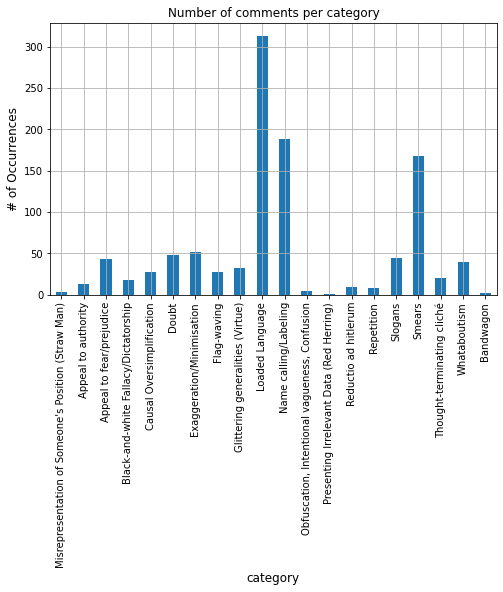

In [ ]:
df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '# of categories')

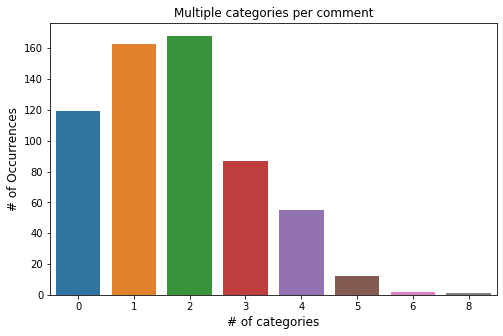

In [ ]:
rowsums = df.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

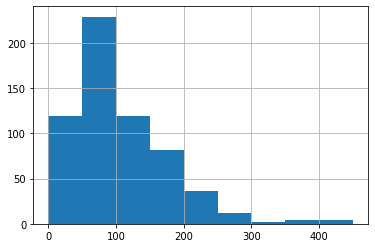

In [ ]:
lens = df.comment_text.str.len()
lens.hist(bins = np.arange(0,500,50))

In [ ]:
print('Number of missing comments in comment text:')
df['comment_text'].isnull().sum()

Number of missing comments in comment text:


0

In [ ]:
df['comment_text'][0]

'THERE ARE ONLY TWO GENDERS\n\nFEMALE \n\nMALE\n'

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text
import nltk
#nltk.download()
from nltk.corpus import stopwords
import re
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
df['comment_text'] = df['comment_text'].str.lower()
df['comment_text'] = df['comment_text'].map(lambda com : clean_text(com))
df2['comment_text'] = df2['comment_text'].map(lambda com : clean_text(com))
df['comment_text'] = df['comment_text'].apply(cleanHtml)
df['comment_text'] = df['comment_text'].apply(cleanPunc)
df['comment_text'] = df['comment_text'].apply(keepAlpha)
df2['comment_text'] = df2['comment_text'].str.lower()
df2['comment_text'] = df2['comment_text'].apply(cleanHtml)
df2['comment_text'] = df2['comment_text'].apply(cleanPunc)
df2['comment_text'] = df2['comment_text'].apply(keepAlpha)

stop_words = set(stopwords.words('english'))
#stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
df['comment_text'] = df['comment_text'].apply(removeStopWords)
df2['comment_text'] = df2['comment_text'].apply(removeStopWords)

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatization(sentence):
    lemmSentence = ""
    for word in sentence.split():
        lemm = lemmatizer.lemmatize(word)
        lemmSentence += lemm
        lemmSentence += " "
    lemmSentence = lemmSentence.strip()
    return lemmSentence
df['comment_text'] = df['comment_text'].apply(lemmatization)
df2['comment_text'] = df2['comment_text'].apply(lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(df['comment_text'][0])
print(df.shape)

two gender female male
(607, 22)


In [ ]:
train=df
test = df2

In [ ]:
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(607,)
(200,)


###Naive Bayes
OneVsRest strategy can be used for multilabel learning, where a classifier is used to predict multiple labels for instance. Naive Bayes supports multi-class, but we are in a multi-label scenario, therefore, we wrap Naive Bayes in the OneVsRestClassifier.

In [ ]:
# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

###Linear SVC

In [ ]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

###Logistic Regression

In [ ]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn
from sklearn.neural_network import MLPRegressor
'''
mlpreg_model = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MLPRegressor(hidden_layer_sizes=(3,), activation='relu'),
                                                         solver='adam', alpha=0.001, batch_size='auto', 
                                                         learning_rate='adaptive', learning_rate_init=0.01,
                                                         power_t=0.5, max_iter=1000, shuffle=True, random_state=9,
                                                         tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                                                         nesterovs_momentum=True, early_stopping=False,
                                                         validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                                                         epsilon=1e-08))
            ])
'''
BNB_model = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RidgeClassifier(tol=1e-2, solver="auto"), n_jobs=1)),
            ])
RC_model = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(BernoulliNB(alpha = 0.12), n_jobs=1)),
            ])
SGDC_model= Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2'), n_jobs=1)),
            ])
'''
BNB_model= BernoulliNB(alpha = 0.12)
RC_model=RidgeClassifier(tol=1e-2, solver="auto")
SGDC_model=SGDClassifier(loss='hinge', penalty='l2')
'''
PAC_model = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(PassiveAggressiveClassifier(max_iter=50), n_jobs=1)),
            ])
RFC_model = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(RandomForestClassifier(), n_jobs=1)),
            ])

In [ ]:
for category in categories:
    df3 = df.copy()
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    # rows=df.shape[0]
    # row=609
    # while (row<df3.shape[0]):
    #   if df3[category].iloc[row]==0:
    #     df3=df3.drop([df3.index[row]])
    #   else:
    #     row=row+1
    train=df3
    X_train = train.comment_text
    print("\n",train.shape,"\n")
    #endlim=0-count
    NB_pipeline.fit(X_train, train[category])
    SVC_pipeline.fit(X_train, train[category])
    LogReg_pipeline.fit(X_train, train[category])
    BNB_model.fit(X_train, train[category])
    RC_model.fit(X_train, train[category])
    SGDC_model.fit(X_train, train[category])
    PAC_model.fit(X_train, train[category])
    RFC_model.fit(X_train, train[category])
    # compute the testing accuracy
    #pred = NB_pipeline.predict(X_test)+SVC_pipeline.predict(X_test)+LogReg_pipeline.predict(X_test)
    df2[category] = (RFC_model.predict(X_test)+PAC_model.predict(X_test)+
                     NB_pipeline.predict(X_test)+SVC_pipeline.predict(X_test)+
                     LogReg_pipeline.predict(X_test)+BNB_model.predict(X_test)+
                     RC_model.predict(X_test)+SGDC_model.predict(X_test))
#    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 

... Processing Bandwagon

 (607, 22) 



In [ ]:
for i in range(5):
    df2["labels"]=""
    thresh = i
    print(df2.shape)
    for row in df2.index:
        dict2=[]
        for category in categories:
            if (df2[category][row]>thresh):
                dict2.append(category)
                #print("hello")
                #df2["labels"][row]+=pil
        dict2.sort()
        df2['labels'][row]=dict2
    #df2["labels"]=df2["labels"].str.rstrip(',')
    #df2["labels"]+=']'
    submission = df2[['id','comment_text','labels']]
    submission.head()
    out = submission.to_json(orient='records', indent=4)
    with open('together_no_drop_thresh_'+str(thresh)+'.txt', 'w') as f:
        f.write(out)

(200, 23)
(200, 23)
(200, 23)
(200, 23)
(200, 23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


###MLP

In [ ]:
mlpreg_model = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MLPRegressor(hidden_layer_sizes=(8,32,128,16,), activation='relu',
                                                         solver='adam', alpha=0.001, batch_size='auto', 
                                                         learning_rate='adaptive', learning_rate_init=0.01,
                                                         power_t=0.5, max_iter=1000, shuffle=True, random_state=9,
                                                         tol=0.0001, verbose=0, warm_start=False, momentum=0.9,
                                                         nesterovs_momentum=True, early_stopping=False,
                                                         validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                                                         ), n_jobs=1 ))
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    df3 = df.copy()
    # rows=df.shape[0]
    # row=609
    # while (row<df3.shape[0]):
    #   if df3[category].iloc[row]==0:
    #     df3=df3.drop([df3.index[row]])
    #   else:
    #     row=row+1
    train=df3
    X_train = train.comment_text
    print("\n",train.shape,"\n")
    #endlim=0-count
    
    mlpreg_model.fit(X_train, train[category])
    # compute the testing accuracy
    #pred = NB_pipeline.predict(X_test)+SVC_pipeline.predict(X_test)+LogReg_pipeline.predict(X_test)
    df2[category] = mlpreg_model.predict(X_test)
#    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))



df2["labels"]=""
print(df2.shape)
for row in df2.index:
    dict2=[]
    for category in categories:
        if (df2[category][row]==1):
            dict2.append(category)
            #print("hello")
            #df2["labels"][row]+=pil
    dict2.sort()
    df2['labels'][row]=dict2
#df2["labels"]=df2["labels"].str.rstrip(',')
#df2["labels"]+=']'
submission = df2[['id','comment_text','labels']]
submission.head()
out = submission.to_json(orient='records', indent=4)
with open('MLP_alone.txt', 'w') as f:
    f.write(out)

... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###NAIVE Alone

In [ ]:
for category in categories:
    print('... Processing {}'.format(category))
    df3 = df.copy()
    train=df3
    X_train = train.comment_text
    print("\n",train.shape,"\n")
    NB_pipeline.fit(X_train, train[category])
    df2[category] = NB_pipeline.predict(X_test)

df2["labels"]=""
print(df2.shape)
for row in df2.index:
    dict2=[]
    for category in categories:
        if (df2[category][row]==1):
            dict2.append(category)
    dict2.sort()
    df2['labels'][row]=dict2
submission = df2[['id','comment_text','labels']]
submission.head()
out = submission.to_json(orient='records', indent=4)
with open('NB_alone.txt', 'w') as f:
    f.write(out)

... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###Many Alone

In [ ]:
modelss=["NB_pipeline", "SVC_pipeline", "LogReg_pipeline", "BNB_model", "RC_model", "SGDC_model", "PAC_model", "RFC_model"]
modelsss=[NB_pipeline, SVC_pipeline, LogReg_pipeline, BNB_model, RC_model, SGDC_model, PAC_model, RFC_model]
# NB_pipeline.fit(X_train, train[category])
#     SVC_pipeline.fit(X_train, train[category])
#     LogReg_pipeline.fit(X_train, train[category])
#     BNB_model.fit(X_train, train[category])
#     RC_model.fit(X_train, train[category])
#     SGDC_model.fit(X_train, train[category])
#     PAC_model.fit(X_train, train[category])
#     RFC_model.fit(X_train, train[category])
for i in range (len(modelsss)):
    model = modelsss[i];
    for category in categories:
        print('... Processing {}'.format(category))
        df3 = df.copy()
        train=df3
        X_train = train.comment_text
        print("\n",train.shape,"\n")
        model.fit(X_train, train[category])
        df2[category] = model.predict(X_test)

    df2["labels"]=""
    print(df2.shape)
    for row in df2.index:
        dict2=[]
        for category in categories:
            if (df2[category][row]==1):
                dict2.append(category)
        dict2.sort()
        df2['labels'][row]=dict2
    submission = df2[['id','comment_text','labels']]
    submission.head()
    out = submission.to_json(orient='records', indent=4)
    with open(modelss[i]+'_alone.txt', 'w') as f:
        f.write(out)

... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 

... Processing Bandwagon

 (607, 22) 

(200, 23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 

... Processing Bandwagon

 (607, 22) 

(200, 23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 

... Processing Bandwagon

 (607, 22) 

(200, 23)
... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 

... Processing Bandwagon

 (607, 22) 

(200, 23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###SVM.SVC

In [ ]:
for category in categories:
    print('... Processing {}'.format(category))
    df3 = df.copy()
    train=df3
    X_train = train.comment_text
    print("\n",train.shape,"\n")
    SVC_pipeline.fit(X_train, train[category])
    df2[category] = SVC_pipeline.predict(X_test)


df2["labels"]=""
print(df2.shape)
for row in df2.index:
    dict2=[]
    for category in categories:
        if (df2[category][row]==1):
            dict2.append(category)
    dict2.sort()
    df2['labels'][row]=dict2
submission = df2[['id','comment_text','labels']]
submission.head()
out = submission.to_json(orient='records', indent=4)
with open('SVM_SVC_alone.txt', 'w') as f:
    f.write(out)

... Processing Misrepresentation of Someone's Position (Straw Man)

 (607, 22) 

... Processing Appeal to authority

 (607, 22) 

... Processing Appeal to fear/prejudice

 (607, 22) 

... Processing Black-and-white Fallacy/Dictatorship

 (607, 22) 

... Processing Causal Oversimplification

 (607, 22) 

... Processing Doubt

 (607, 22) 

... Processing Exaggeration/Minimisation

 (607, 22) 

... Processing Flag-waving

 (607, 22) 

... Processing Glittering generalities (Virtue)

 (607, 22) 

... Processing Loaded Language

 (607, 22) 

... Processing Name calling/Labeling

 (607, 22) 

... Processing Obfuscation, Intentional vagueness, Confusion

 (607, 22) 

... Processing Presenting Irrelevant Data (Red Herring)

 (607, 22) 

... Processing Reductio ad hitlerum

 (607, 22) 

... Processing Repetition

 (607, 22) 

... Processing Slogans

 (607, 22) 

... Processing Smears

 (607, 22) 

... Processing Thought-terminating cliché

 (607, 22) 

... Processing Whataboutism

 (607, 22) 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###DEEP LEARNING MODEL

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, MaxPooling1D, Conv1D, Bidirectional, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')
import pickle
vocab_size = 10000
batch_size = 32
epochs = 6
max_len = 25
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_df=df
test_df=df2
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='accuracy', 
                                              patience=3, verbose=0, 
                                              restore_best_weights=True)]

for category in categories:
    
    ##Trying something different
    '''
    df3 = train_df.copy()
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    rows=train_df.shape[0]
    row=609
    while (row<df3.shape[0]):
      if df3[category].iloc[row]==0:
        df3=df3.drop([df3.index[row]])
      else:
        row=row+1
    train=df3
    x_train, y_train = train['comment_text'].iloc[:].values, train[category].iloc[:].values
    ## Tried something different
    '''
    print('... Processing {}'.format(category))
    x_train, y_train = train_df['comment_text'].iloc[:].values, train_df[category].iloc[:].values
    print("\n",x_train.shape,"\n")

    tokenizer = Tokenizer(num_words=vocab_size)
    tokenizer.fit_on_texts(x_train)
    sequences = tokenizer.texts_to_sequences(x_train)
    x_train_new = pad_sequences(sequences, maxlen=max_len)
    
    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    # model.add(LSTM(128, dropout=0.2))
    model.add(Bidirectional(LSTM(128, dropout=0.5)))
    # model.add(MaxPooling1D(pool_size=2))
    # model.add(LSTM(64, dropout=0.2))
    #model.add(Dense(64, activation='tanh'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

    model.fit(x_train_new, y_train, batch_size=batch_size, epochs=epochs, verbose = 1, callbacks=callbacks)
    
    
    x_test = test_df['comment_text'].iloc[:].values
    sequences = tokenizer.texts_to_sequences(x_test)
    x_test_new = pad_sequences(sequences, maxlen=max_len)
    test_df[category] = model.predict(x_test_new)
    del model  # deletes the existing model



... Processing Misrepresentation of Someone's Position (Straw Man)

 (607,) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          12320     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               164864    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                8224      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112      
__________________________________________

In [ ]:
# thresh=0.3
# thresh=0.4
# thresh=0.5
# thresh=0.6
threshes = [0.2, 0.3, 0.4, 0.5, 0.6]
for thresh in threshes:
    df2["labels"]=""
    print(df2.shape)
    for row in df2.index:
        dict2=[]
        for category in categories:
            if (df2[category][row]>=thresh):
                dict2.append(category)
        dict2.sort()
        df2['labels'][row]=dict2
    submission = df2[['id','comment_text','labels']]
    submission.head()
    out = submission.to_json(orient='records', indent=4)
    with open('DL_thresh_'+str(thresh)+'.txt', 'w') as f:
        f.write(out)

(200, 23)
(200, 23)
(200, 23)
(200, 23)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(200, 23)
